## Digit Recognizer with Neural Network (NN)

### A Kaggle Submission
_Current validation accuracy (local): 97.60%_

Submission link:

[https://www.kaggle.com/code/alfaecho/digit-recognizer-with-nn](https://www.kaggle.com/code/alfaecho/digit-recognizer-with-nn)

### 1. Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

### 2. Load Data

In [28]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [29]:
train_data.info()
print('----------------------------------------')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [30]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Preprocess the Data

In [32]:
# Extract features and labels
X = train_data.drop("label", axis=1).values / 255.0  # Normalize pixel values to [0, 1]
y = train_data["label"].values

# One-hot encode the labels
y = to_categorical(y, num_classes=10)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Load and Prepare Test Data:

In [33]:
X_test = test_data.values / 255.0  # Normalize test data

### 4. Visualize the Train Data

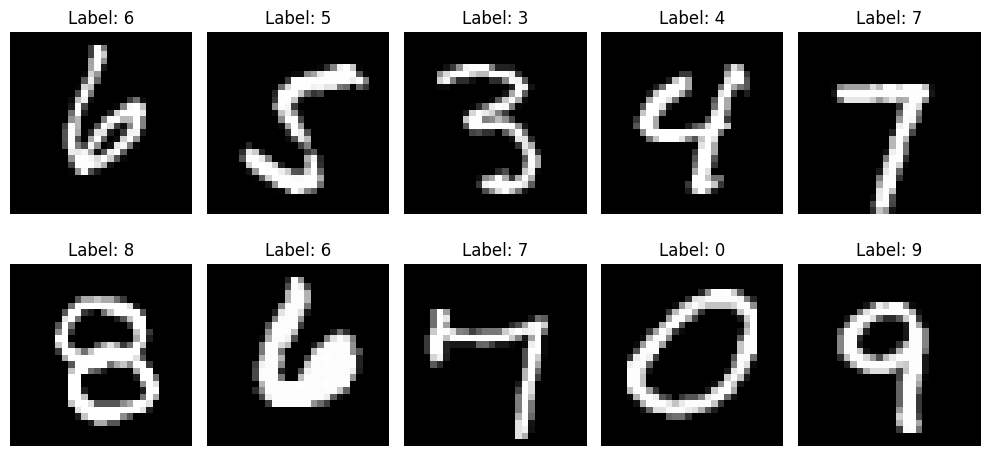

In [34]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### 5. Build the Neural Network

In [35]:
model = Sequential(
    [
        Dense(128, activation="relu", input_shape=(784,)),
        Dropout(0.2),  # Add dropout to prevent overfitting
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),  # Output layer for 10 classes
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

f:\SDUST-Masters\Machine Learning\Digit Recognizer\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 6. Train the Neural Network

In [36]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # 10 epochs
    batch_size=32,
)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8078 - loss: 0.6320 - val_accuracy: 0.9507 - val_loss: 0.1716
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9458 - loss: 0.1768 - val_accuracy: 0.9575 - val_loss: 0.1407
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9622 - loss: 0.1248 - val_accuracy: 0.9656 - val_loss: 0.1143
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9679 - loss: 0.0996 - val_accuracy: 0.9663 - val_loss: 0.1032
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9736 - loss: 0.0862 - val_accuracy: 0.9721 - val_loss: 0.0952
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9766 - loss: 0.0706 - val_accuracy: 0.9700 - val_loss: 0.1018
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9799 - loss: 0.0622 - val_accuracy: 0.9715 - val_loss: 0.0929
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9820 - loss: 0.0565 - 

Visualize the training and validation accuracy/loss to understand model behavior:

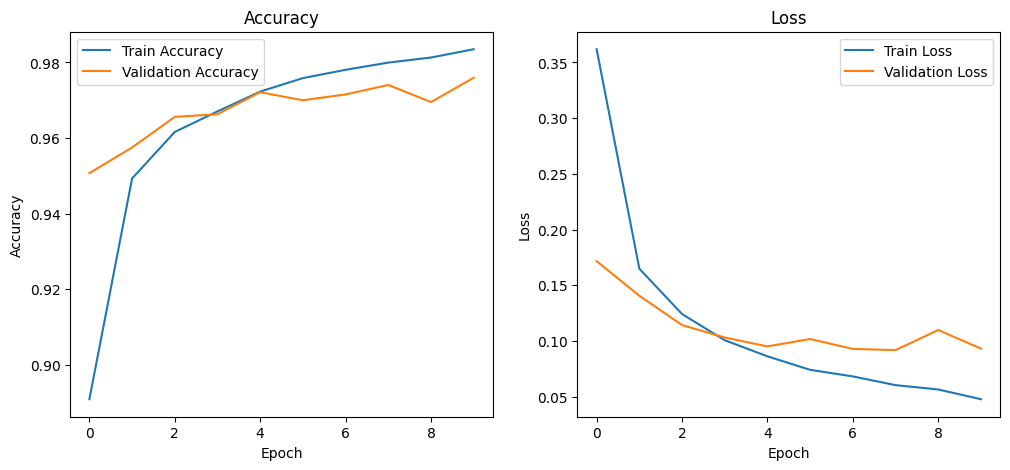

In [37]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### 7. Evaluate the Model

In [38]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.1077
Validation Accuracy: 97.60%


### 8. Make Predictions

In [39]:
predictions = np.argmax(
    model.predict(X_test), axis=1
)  # Get the class with highest probability

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


#### Visualize Some Test Images and Predictions

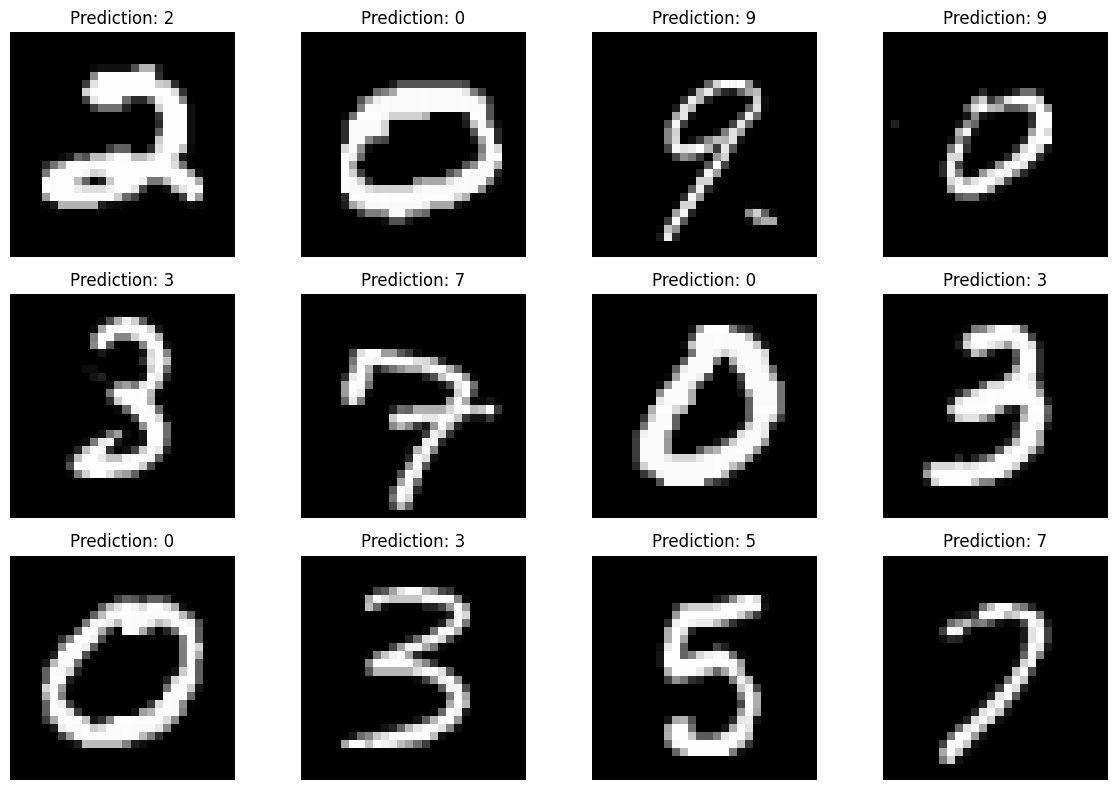

In [40]:
plt.figure(figsize=(12, 8))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Prediction: {predictions[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

### 9. Prepare the Submission File

In [41]:
submission = pd.DataFrame(
    {"ImageId": np.arange(1, len(predictions) + 1), "Label": predictions}
)

# Save to CSV
submission.to_csv("submission.csv", index=False)

In [43]:
submission_data = pd.read_csv("submission.csv")

In [44]:
submission_data

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
